In [1]:
# Import libraries
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
# from google.colab import drive 

In [2]:
# Mounting google drive 
# drive.mount('/content/Drive')

In [3]:
# Import dataset
df = pd.read_csv('./Dataset/Mall_Customers.csv')

In [4]:
# Check dataset top 5 row
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# Check columns
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
# Renaming column name
df = df.rename(columns={'Gender':'gender', 'Age':'age', 'Annual Income (k$)':'annual_income', 'Spending Score (1-100)':'spending_score'})

In [7]:
# Check changing columns
df.columns

Index(['CustomerID', 'gender', 'age', 'annual_income', 'spending_score'], dtype='object')

In [8]:
# Check unique value on gender
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [9]:
df['gender'].replace(['Female', 'Male'], [0,1], inplace=True)

In [10]:
# Recheck data
df.head()

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [11]:
# Drop unused column
df = df.drop(columns=['CustomerID','gender'], axis=1)

In [12]:
# Recheck again
df.head()

,age,annual_income,spending_score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [13]:
clusters = []

for x in range(1,11):
  km = KMeans(n_clusters=x).fit(df)
  clusters.append(km.inertia_)

In [14]:
import seaborn as sbn

Text(0, 0.5, 'Inertia')

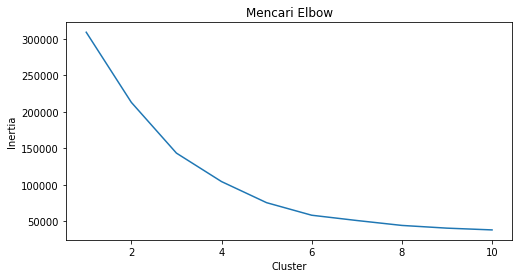

In [15]:
fig, ax = plt.subplots(figsize=(8,4))
sbn.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('Mencari Elbow')
ax.set_xlabel('Cluster')
ax.set_ylabel('Inertia')

C:\Users\Home\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


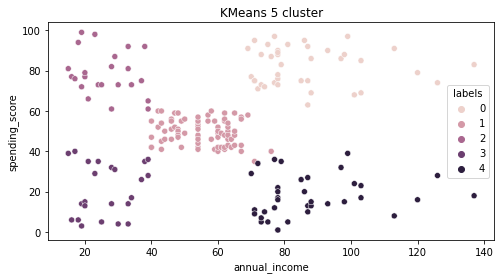

In [16]:
km5 = KMeans(n_clusters=5).fit(df)

df['labels'] = km5.labels_

plt.figure(figsize=(8,4))

sbn.scatterplot(df['annual_income'], df['spending_score'], hue=df['labels'])

plt.title('KMeans 5 cluster')
plt.show()

In [17]:
df['labels']

0      3
1      2
2      3
3      2
4      3
      ..
195    0
196    4
197    0
198    4
199    0
Name: labels, Length: 200, dtype: int32